   # Création du DataFrame

In [4]:
import pandas as pd
import csv

prenoms_df = pd.read_csv("/home/campus15/Desktop/Python_Projet_OriginePrenoms/dpt2018.csv", sep = ";", na_values = ["XXXX", "XX"])
prenoms_df

,sexe,preusuel,annais,dpt,nombre
0,1,A,NaN,NaN,27
1,1,AADAM,NaN,NaN,27
2,1,AADEL,NaN,NaN,55
3,1,AADIL,1983.0,84.0,3
4,1,AADIL,1992.0,92.0,3
...,...,...,...,...,...
3624989,2,ÉYA,2014.0,69.0,3
3624990,2,ÉYA,NaN,NaN,23
3624991,2,ÏNAYA,NaN,NaN,21
3624992,2,ÖZGE,NaN,NaN,30


   # Quelle est la proportion totale Femmes / Hommes au depuis 1900 ?

In [4]:
prenoms_df["sexe"] = prenoms_df.sexe.replace([1, 2], ['Homme', 'Femme']) # Remplace les 1 et 2 par h/f
prenoms_df["sexe"].value_counts(normalize = True)

Femme    0.536878
Homme    0.463122
Name: sexe, dtype: float64

   # Evolution de la proportion au cours du temps

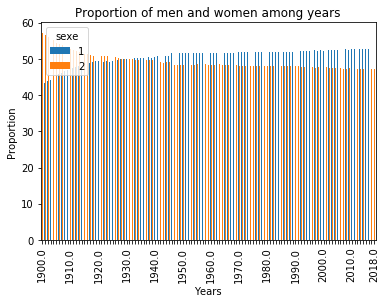

In [2]:
import matplotlib.pyplot as plt
import numpy as np

sex_year = prenoms_df.loc[:,["sexe", "annais", "nombre"]].copy()
sex_year2 = sex_year.groupby(["annais", "sexe"]).sum()
sex_year2 = sex_year2.groupby(level = 0).apply(lambda x: (x/float(x.sum())*100))

%matplotlib inline
ax = sex_year2.squeeze().unstack().plot(kind = "bar")  #squeeze transforme un dataframe en serie
xticks = ax.xaxis.get_major_ticks()

for i,tick in enumerate(xticks):  
        if i%10 != 0:
            tick.label1.set_visible(False)

xticks[-1].label1.set_visible(True)

plt.title('Proportion of men and women among years')
plt.xlabel('Years')
plt.ylabel('Proportion')
plt.show()

   # Regrouper évoultion par decennie (version creation de fonction)

In [4]:
step = 10
decades = range(1900, 2020, step)
d={}
for i in decades:
    d[i] =  range(i, i+step)
    
def dec(x):
    for decade, years in d.items():
        if x in years:
            return decade

In [5]:
sex_year["decennie"] = sex_year.annais.apply(dec)
sex_year
# sex_year.drop(columns=["Decennie"])

,sexe,annais,nombre,decennie
0,Homme,NaN,27,NaN
1,Homme,NaN,27,NaN
2,Homme,NaN,55,NaN
3,Homme,1983.0,3,1980.0
4,Homme,1992.0,3,1990.0
...,...,...,...,...
3624989,Femme,2014.0,3,2010.0
3624990,Femme,NaN,23,NaN
3624991,Femme,NaN,21,NaN
3624992,Femme,NaN,30,NaN


In [6]:
sex_year_dec = sex_year.loc[:,["sexe", "decennie", "nombre"]].copy()
sex_year_dec = sex_year_dec.groupby(["decennie", "sexe"]).sum()
sex_year_dec = sex_year_dec.groupby(level = 0).apply(lambda x: (x/float(x.sum())*100))

%matplotlib
ax = sex_year_dec.squeeze().unstack().plot(kind = "bar", stacked=False, width = 0.9) #squeeze transforme un dataframe en serie

plt.title('Proportion of men and women among years')
plt.xlabel('Years')
plt.ylabel('Proportion')
plt.show()

Using matplotlib backend: Qt5Agg


   # Regrouper évoultion par decennie (version .cut)

In [7]:
cut_bins = list(range(1900, 2021, 10))
cut_labels = cut_bins[:-1]


sex_year["test_cut"] = pd.cut(sex_year.annais, bins = cut_bins, labels = cut_labels)

sex_year_dec_cut = sex_year.loc[:,["sexe", "test_cut", "nombre"]].copy()
sex_year_dec_cut = sex_year_dec_cut.groupby(["test_cut", "sexe"]).sum()
sex_year_dec_cut = sex_year_dec_cut.groupby(level = 0).apply(lambda x: (x/float(x.sum())*100))

%matplotlib
ax = sex_year_dec_cut.squeeze().unstack().plot(kind = "bar", stacked=False, width = 0.9) #squeeze transforme un dataframe en serie

plt.title('Proportion of men and women among years')
plt.xlabel('Years')
plt.ylabel('Proportion')
plt.show()

Using matplotlib backend: Qt5Agg


   # En 1900, parmi les 1707 prénoms recensés par l’Insee, le plus donné, Marie,représentait 11% des naissances.

In [8]:
qte_marie = prenoms_df[(prenoms_df.annais == 1900)].preusuel.value_counts()["MARIE"]
prop_marie = qte_marie /  len(prenoms_df[(prenoms_df.annais == 1900)].preusuel.unique())*100
prop_marie

16.93386773547094

   # En 2017, on recensait 13.000 prénoms différents, soit 7,6 fois plus qu’en 1900.

In [9]:
name_diff = len(prenoms_df[(prenoms_df.annais == 2017)].preusuel.unique()) 
fact_name_diff = len(prenoms_df[(prenoms_df.annais == 2017)].preusuel.unique()) / len(prenoms_df[(prenoms_df.annais == 1900)].preusuel.unique())
print("En 2017 il y avait", name_diff, "prénoms différents. Soit", fact_name_diff, "fois plus qu'en 1900.")

En 2017 il y avait 4399 prénoms différents. Soit 4.407815631262525 fois plus qu'en 1900.


   # Evolution du prénom Marie dans le temps ?

In [105]:
marie_by_year = prenoms_df[(prenoms_df.preusuel == "MARIE")].loc[:,["annais", "preusuel", "nombre"]].copy()
marie_by_year = marie_by_year.groupby(["annais"]).sum()
ax = marie_by_year.plot()
plt.title('Proportion of Marie among years')
plt.xlabel('Years')
plt.ylabel('Proportion of Marie')
ax.legend(["Nombre de Marie"])
plt.show()

   # Un pic a été atteint en 2012, avec plus de 13.643 prénoms recensés. 

In [12]:
pic_year = prenoms_df.loc[:,["preusuel", "annais", "nombre"]].copy()
pic_year = pic_year.groupby(["annais"]).sum()
ymax = float(pic_year.idxmax())
xmax = float(pic_year.max())
ax = pic_year.plot()
plt.title('Proportion of names among years')
plt.xlabel('Years')
plt.ylabel('Proportion of names')
ax.legend(["Nombre de noms"])
plt.axvline(x=ymax, dashes=[5, 5, 5, 5], color = "red")
plt.axhline(y=xmax, dashes=[5, 5, 5, 5], color = "red")
plt.text(ymax +1, xmax + 5500,f"Max : {ymax:.0f}; {xmax:.0f}", fontsize=9, color = 'red', fontweight='bold')  #le f permet d'afficher des variables 
#directement en les nommant entre {}. le ":.0f" indique le nombre de chiffres après la virgule que l'on souhaite ici 0
plt.show()

        nombre
annais        
1900.0  393432
1901.0  431732
1902.0  443886
1903.0  446633
1904.0  456906
...        ...
2014.0  620578
2015.0  602227
2016.0  586962
2017.0  573677
2018.0  564259

[119 rows x 1 columns]


# Evolution des prénoms composés contenant Marie au cours du temps (Marie-Pierre, Marie-Paul, ....) ?

In [106]:
marie_compose_mask = prenoms_df.preusuel.str.contains('MARIE', na = False)
marie_comp = prenoms_df.loc[marie_compose_mask].copy()
marie_comp_evolve = marie_comp.loc[:,["annais","preusuel","nombre"]].copy()
marie_comp_evolve = marie_comp_evolve.groupby(["annais"]).sum()
ax = marie_comp_evolve.plot()
plt.title('Proportion of composed Marie names among years')
plt.xlabel('Years')
plt.ylabel('Proportion of composed Marie names')
ax.legend(["Nombre de prénoms composés Marie"])
plt.show()

# Combien de prénoms faut-il pour nommer 50% des bébés par année (e.g. en 1900, 27 prénoms suffisent) ?


In [27]:
half_name = prenoms_df.loc[:,["annais", "preusuel", "nombre"]].copy()
half_name = half_name.groupby(["annais", "preusuel"]).sum() 
half_name.loc[(slice(None), "_PRENOMS_RARES"), :] #le slice permet de balayer toutes les colonnes à la recherche du mot clé
half_name = half_name.drop(level = 1, labels = "_PRENOMS_RARES")
half_name_sort = half_name.sort_values(by = 'nombre', ascending=False).sort_index(level = 0, sort_remaining = False)
number_half_cum = half_name_sort.groupby(level = 0).cumsum()  #level 0 prend en compte la premiere colonne "annais", level 1 "preusuel"
number_half_sum = half_name_sort.groupby(level = 0).sum()
number_half_name = (number_half_cum/number_half_sum)<= 0.50
number_half_name = number_half_name.groupby(level = 0).sum()
ax = number_half_name.plot()
plt.title('Proportion of number of names (50%) among years')
plt.xlabel('Years')
plt.ylabel('Proportion of number of names (50%)')
ax.legend(["Nombre de prénoms (50%)"])
plt.show()

NameError: name 'plt' is not defined

# La part des 10 prénoms les plus utilisés a-t-elle bien été divisée par 5 entre 1900 et aujourd’hui ?


## 1ère façon

In [17]:
ten_name = half_name_sort.groupby(level=0, squeeze=True).apply(lambda x: x.nlargest(10, 'nombre'))
ten_name_sum = ten_name.groupby(level = 0).sum()
ax = ten_name_sum.plot()
ymax = float(ten_name_sum.idxmax())
xmax = float(ten_name_sum.max())
plt.title('Proportion of 10 most present names among years')
plt.xlabel('Years')
plt.ylabel('Proportion of 10 most present names')
ax.legend(["Proportion des 10 prénoms les plus répandus"])
plt.axvline(x=ymax, dashes=[5, 5, 5, 5], color = "red")
plt.axhline(y=xmax, dashes=[5, 5, 5, 5], color = "red")
plt.text(ymax +1, xmax + 2500,f"Max : {ymax:.0f}; {xmax:.0f}", fontsize=9, color = 'red', fontweight='bold') 
plt.show()

In [27]:
ten_name_sum.loc[1900]/ten_name_sum.loc[2018]

nombre    3.058609
dtype: float64

## 2ème façon

In [7]:
half_name_sort.groupby(level=0).apply(lambda x: x.sort_values('nombre', ascending=False).head(10)).droplevel(0)

nombre
annais preusuel          
1900.0 MARIE        49752
       JEAN         14100
       JEANNE       13981
       LOUIS         9051
       MARGUERITE    8058
...                   ...
2018.0 LUCAS         3978
       JADE          3977
       ADAM          3885
       LOUISE        3765
       ARTHUR        3753

[1190 rows x 1 columns]

## 3ème façon

In [8]:
half_name_sort.squeeze().groupby(level=0).nlargest(10).droplevel(0)

annais  preusuel  
1900.0  MARIE         49752
        JEAN          14100
        JEANNE        13981
        LOUIS          9051
        MARGUERITE     8058
                      ...  
2018.0  LUCAS          3978
        JADE           3977
        ADAM           3885
        LOUISE         3765
        ARTHUR         3753
Name: nombre, Length: 1190, dtype: int64

# Le prénom Loic et sa diffusion depuis la Bretagne

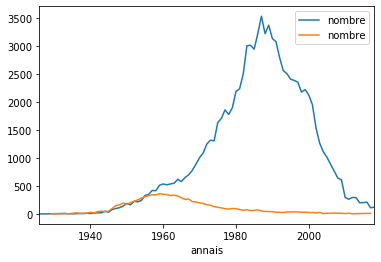

In [75]:
loic_name = prenoms_df[(prenoms_df.preusuel == 'LOÏC')].loc[:,["dpt","annais", "nombre"]].copy()
loic_name = loic_name.groupby(["annais", "dpt"]).sum()
bretagne = [22, 29, 35, 56]
loic_name_bretagne = loic_name.loc[(slice(None), bretagne), :].copy()
loic_name_bretagne = loic_name_bretagne.groupby(level = 0).sum()
loic_name_else = loic_name.drop(level = 1, labels = bretagne)
loic_name_else = loic_name_else.groupby(level = 0).sum()
p1 = loic_name_else.plot()
loic_name_bretagne.plot(ax=p1)  # ax=p1 pour plot le deuxieme graphe dans le premier
plt.show()

# Folium

In [8]:
import folium
from ipywidgets import interact
from folium.plugins import HeatMap

In [14]:
#import departement
import pickle
departement = pickle.load(open("dico_adress.pkl","rb"))
france_gps = [46.603354, 1.8883335]
folium.Map(france_gps, zoom_start=5)
carte = folium.Map(france_gps, zoom_start=13)

In [51]:
loic_name_folium = prenoms_df[(prenoms_df.preusuel == 'LOÏC')].loc[:,["dpt","annais", "nombre"]].copy()
loic_name_folium["COORDS"]= loic_name_folium.dpt.dropna().apply(lambda x: departement[x])
loic_name_folium

,dpt,annais,nombre,COORDS
980086,44.0,1926.0,3,"[47.216667, -1.55]"
980087,44.0,1928.0,4,"[47.216667, -1.55]"
980088,22.0,1929.0,5,"[48.516667, -2.783333]"
980089,35.0,1932.0,4,"[48.083333, -1.683333]"
980090,22.0,1933.0,3,"[48.516667, -2.783333]"
...,...,...,...,...
984825,92.0,2018.0,7,"[48.9, 2.2]"
984826,94.0,2018.0,4,"[48.783333, 2.466667]"
984827,95.0,2018.0,3,"[49.033333, 2.066667]"
984828,973.0,2018.0,4,"[0, 0]"


In [39]:
HeatMap([[46.603354, 1.8883335]], 1000).add_to(carte)
carte

In [32]:
departement

{1.0: array([46.2     ,  5.216667]),
 3.0: array([46.566667,  3.333333]),
 7.0: array([44.733333,  4.6     ]),
 15.0: array([44.916667,  2.45    ]),
 26.0: array([44.933333,  4.9     ]),
 38.0: array([45.166667,  5.716667]),
 42.0: array([43.233333,  0.083333]),
 43.0: array([45.04,  3.89]),
 63.0: array([45.783333,  3.083333]),
 69.0: array([45.75,  4.85]),
 73.0: array([45.566667,  5.933333]),
 74.0: array([45.9     ,  6.116667]),
 21.0: array([47.316667,  5.016667]),
 25.0: array([47.25    ,  6.033333]),
 39.0: array([46.666667,  5.55    ]),
 58.0: array([46.983333,  3.166667]),
 70.0: array([47.633333,  6.166667]),
 71.0: array([46.3     ,  4.833333]),
 89.0: array([47.8     ,  3.566667]),
 90.0: array([47.633333,  6.866667]),
 35.0: array([48.083333, -1.683333]),
 22.0: array([48.516667, -2.783333]),
 56.0: array([47.666667, -2.75    ]),
 29.0: array([48. , -4.1]),
 18.0: array([47.083333,  2.4     ]),
 28.0: array([48.45,  1.5 ]),
 36.0: array([46.816667,  1.7     ]),
 37.0: arra